In [1]:
%matplotlib inline
%config InlineBackend.rc={'figure.figsize': (8, 6)}
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import neighbors
import matplotlib.patches as mpatches
from sklearn.model_selection import train_test_split

In [2]:
def ajustarArray(x):
    array = np.array([])
    for z in x:
        array = np.append(array, z)
    return array

In [3]:
# função criada para no dataset de testes retornar 5 para VERDADEIRO e 4 para FALSO
# utilizei essa função para visualizar as linhas certas e as erradas em diferentes cores no gráfico de disperção 
def resultadoTeste(resultado_treino, gabarito_teste):
    x = (resultado_treino == gabarito_teste)
    x = x+4
    return x

In [4]:
# Definir os tipos de Iris para valores númericos
# utilizei essa função também para visualizar os tipos de Iris no gráfico 
def tipoDeIris(x):
    if x == 'Iris-setosa':
        return 1
    elif x == 'Iris-versicolor':
        return 2
    else:
        return 3

In [5]:
# Ler os dados do arquivo .CSV e nomear as colunas
dfIris = pd.read_csv('iris.csv', header=None)
dfIris.columns=(['Largura Sepala', 'Comprimento Sepala', 'Largura Petala', 'Comprimento Petala', 'Tipo'])

In [6]:
# Verificar a quantidade de colunas tem o dataset
len(dfIris.columns)

5

In [7]:
# Verificar os tipos de classes existentes
dfIris['Tipo'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [8]:
# Verificar a quantidade de cada classe tem no dataset
print('Class Iris-setosa: ', dfIris.loc[dfIris['Tipo'] == 'Iris-setosa']['Tipo'].count())
print('Class Iris-versicolor: ', dfIris.loc[dfIris['Tipo'] == 'Iris-versicolor']['Tipo'].count())
print('Class Iris-virginica: ', dfIris.loc[dfIris['Tipo'] == 'Iris-virginica']['Tipo'].count())

Class Iris-setosa:  50
Class Iris-versicolor:  50
Class Iris-virginica:  50


In [9]:
# Criar mais uma coluna chamada de 'NumTipo' que define os tipos de Iris em valores númericos
dfIris['NumTipo'] = dfIris['Tipo'].apply(tipoDeIris)

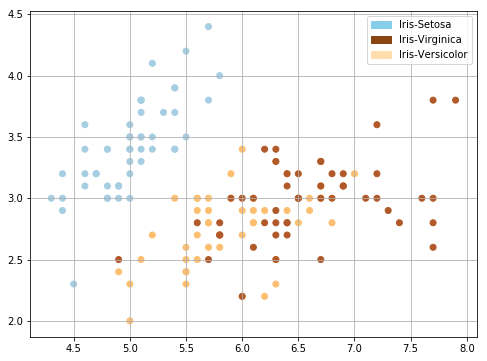

In [10]:
# Vizualizando o corportamento dos dados através do gráfico de dispersão
# Análise da largura da sepala por Comprimento da Sepala
plt.scatter(
    dfIris['Largura Sepala'], dfIris['Comprimento Sepala'], 
    c=dfIris['NumTipo'], cmap='Paired', alpha=1.5
)

azul = mpatches.Patch(color='skyblue', label='Iris-Setosa')
marrom = mpatches.Patch(color='saddlebrown', label='Iris-Virginica')
bege = mpatches.Patch(color='navajowhite', label='Iris-Versicolor')
plt.legend(handles=[azul, marrom, bege])

plt.grid(True)
plt.show()

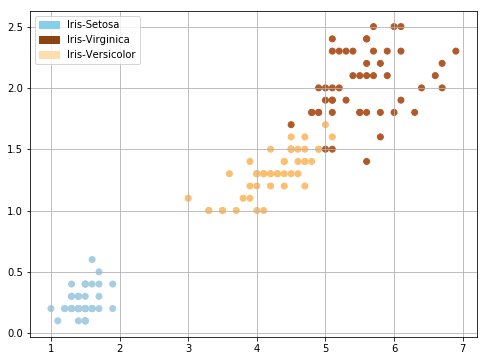

In [11]:
# Vizualizando o corportamento dos dados através do gráfico de dispersão
# Análise da largura da Petala por Comprimento da Petala
plt.scatter(
    dfIris['Largura Petala'], dfIris['Comprimento Petala'], 
    c=dfIris['NumTipo'], cmap='Paired', alpha=1
)

azul = mpatches.Patch(color='skyblue', label='Iris-Setosa')
marrom = mpatches.Patch(color='saddlebrown', label='Iris-Virginica')
bege = mpatches.Patch(color='navajowhite', label='Iris-Versicolor')
plt.legend(handles=[azul, marrom, bege])

plt.grid(True)
plt.show()

In [12]:
#Treinamento
x = dfIris[['Largura Sepala','Comprimento Sepala', 'Largura Petala', 'Comprimento Petala']]
y = dfIris[['NumTipo']]
knn = neighbors.KNeighborsClassifier(n_neighbors=11)
knn.fit(x, y)
#resultado_treino recebe o valor em array
resultado_treino = knn.predict(x)

c:\users\almer\venv\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
    

In [20]:
# Para realizar a comparação do resultado_treino com y_teste para verificar a precisão de acertos foi utilizado a 
# função ajustarArray, pois resultado_treino é um array[n] e o y_teste é pandas.dataframe (convertido para uma array[n][0] pela 
# função .as_matrix() por esse motivo não poderia ser comparado simplesmente por resultado_treino == y_teste ou 
# resultado_treino == y_teste.as_matrix())

# Definindo estrutura de dados semelhantes para comparação
y_teste = ajustarArray(y.as_matrix())
# Passando os valores para transformar os resultados do treinamento (VERDAIDERO e FALSO em valores 5 e 4, repectivamente)
res = resultadoTeste(resultado_treino, y_teste)
# Criando um dataset de resultados dos testes
dataset_teste = x.copy()
dataset_teste['Tipo'] = res

array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5])

In [14]:
# Criando um dataset de resultados do treinamento
dataset_treino = x.copy()
dataset_treino['Tipo'] = y
dataset_treino

,Largura Sepala,Comprimento Sepala,Largura Petala,Comprimento Petala,Tipo
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
5,5.4,3.9,1.7,0.4,1
6,4.6,3.4,1.4,0.3,1
7,5.0,3.4,1.5,0.2,1
8,4.4,2.9,1.4,0.2,1
9,4.9,3.1,1.5,0.1,1


In [15]:
# Criando um dataset de resultados do treinamento junto com o de dataset de resultados dos testes
dataset_resultado = [dataset_treino, dataset_teste]
dataset_resultado = pd.concat(dataset_resultado)
dataset_resultado


,Largura Sepala,Comprimento Sepala,Largura Petala,Comprimento Petala,Tipo
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
5,5.4,3.9,1.7,0.4,1
6,4.6,3.4,1.4,0.3,1
7,5.0,3.4,1.5,0.2,1
8,4.4,2.9,1.4,0.2,1
9,4.9,3.1,1.5,0.1,1


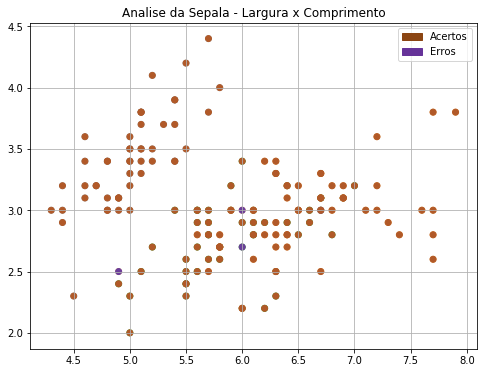

In [34]:
# Vizualizando o corportamento dos dados resultantes através do gráfico de dispersão
# Análise da largura da Sepala por Comprimento da Sepala
plt.scatter(
    dataset_resultado['Largura Sepala'], dataset_resultado['Comprimento Sepala'], 
    c=dataset_resultado['Tipo'], cmap='Paired', alpha=1
)

#azul = mpatches.Patch(color='skyblue', label='Iris-Setosa')
#bege = mpatches.Patch(color='navajowhite', label='Iris-Virginica')
#verde = mpatches.Patch(color='green', label='Iris-Versicolor')
marron = mpatches.Patch(color='saddlebrown', label='Acertos')
roxo = mpatches.Patch(color='rebeccapurple', label='Erros')

plt.legend(handles=[marron, roxo])
plt.title('Analise da Sepala - Largura x Comprimento')

plt.grid(True)
plt.show()

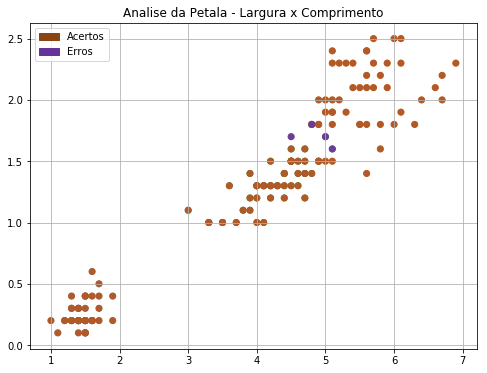

In [33]:
# Vizualizando o corportamento dos dados resultantes através do gráfico de dispersão
# Análise da largura da Petala por Comprimento da Petala
plt.scatter(
    dataset_resultado['Largura Petala'], dataset_resultado['Comprimento Petala'], 
    c=dataset_resultado['Tipo'], cmap='Paired', alpha=1
)

#azul = mpatches.Patch(color='skyblue', label='Iris-Setosa')
#bege = mpatches.Patch(color='navajowhite', label='Iris-Virginica')
#verde = mpatches.Patch(color='green', label='Iris-Versicolor')
marron = mpatches.Patch(color='saddlebrown', label='Acertos')
roxo = mpatches.Patch(color='rebeccapurple', label='Erros')

plt.legend(handles=[marron, roxo])
plt.title('Analise da Petala - Largura x Comprimento')

plt.grid(True)
plt.show()

In [26]:
acuracia = knn.score(x, y)
acuracia

array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5])

In [31]:
# mostrando registros errados, se houver
dataset_resultado[dataset_resultado['Tipo'] == 4]

,Largura Sepala,Comprimento Sepala,Largura Petala,Comprimento Petala,Tipo
77,6.7,3.0,5.0,1.7,4
83,6.0,2.7,5.1,1.6,4
106,4.9,2.5,4.5,1.7,4
138,6.0,3.0,4.8,1.8,4
